In [ ]:
import numpy as np
import pandas as pd
import os

: 

In [7]:
df = pd.read_csv("datasets\m1\All_Types_Features.csv")
# jpg_df = pd.read_csv("/kaggle/input/fft75-dataset/JPG_Features.csv")
# png_df = pd.read_csv("/kaggle/input/fft75-dataset/PNG_Features.csv")
# txt_df = pd.read_csv("/kaggle/input/fft75-dataset/TXT_Features.csv")
# mp3_df = pd.read_csv("/kaggle/input/fft75-dataset/MP3_Features.csv")
# mov_df = pd.read_csv("/kaggle/input/fft75-dataset/MOV_Features.csv")

In [8]:
df.head()

,mean Byte Value,probability distribution (STD),probability distribution (Mean),probability distribution (MAD),Longest Streak,Longest Byte,unigram frequencies (STD),unigram frequencies (Mean),unigram frequencies (MAD),Hamming Weight,Shannon Entropy,sub_class,main_class,class_name
0,120.263672,0.003731,0.004673,0.002277,22,0,1.910409,2.392523,1.165779,0.479736,7.442813,3,3,video
1,117.582031,0.002360,0.004425,0.001909,6,0,1.208507,2.265487,0.977289,0.473145,7.626060,7,4,audio
2,0.000000,0.000000,1.000000,0.000000,512,0,0.000000,512.000000,0.000000,0.000000,0.000000,3,3,video
3,124.810547,0.002491,0.004505,0.001963,7,159,1.275499,2.306306,1.005194,0.498779,7.591452,3,3,video
4,0.000000,0.000000,1.000000,0.000000,512,0,0.000000,512.000000,0.000000,0.000000,0.000000,4,4,audio


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178031 entries, 0 to 178030
Data columns (total 14 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   mean Byte Value                  178031 non-null  float64
 1   probability distribution (STD)   178031 non-null  float64
 2   probability distribution (Mean)  178031 non-null  float64
 3   probability distribution (MAD)   178031 non-null  float64
 4   Longest Streak                   178031 non-null  int64  
 5   Longest Byte                     178031 non-null  int64  
 6   unigram frequencies (STD)        178031 non-null  float64
 7   unigram frequencies (Mean)       178031 non-null  float64
 8   unigram frequencies (MAD)        178031 non-null  float64
 9   Hamming Weight                   178031 non-null  float64
 10  Shannon Entropy                  178031 non-null  float64
 11  sub_class                        178031 non-null  int64  
 12  ma

In [10]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# Drop rows with missing values (Alternative: You can also impute missing values)
df = df.dropna()

# Verify missing values are removed
print("Missing Values After Cleaning:\n", df.isnull().sum())

Missing Values:
 mean Byte Value                    0
probability distribution (STD)     0
probability distribution (Mean)    0
probability distribution (MAD)     0
Longest Streak                     0
Longest Byte                       0
unigram frequencies (STD)          0
unigram frequencies (Mean)         0
unigram frequencies (MAD)          0
Hamming Weight                     0
Shannon Entropy                    0
sub_class                          0
main_class                         0
class_name                         0
dtype: int64
Missing Values After Cleaning:
 mean Byte Value                    0
probability distribution (STD)     0
probability distribution (Mean)    0
probability distribution (MAD)     0
Longest Streak                     0
Longest Byte                       0
unigram frequencies (STD)          0
unigram frequencies (Mean)         0
unigram frequencies (MAD)          0
Hamming Weight                     0
Shannon Entropy                    0
sub_class    

In [11]:
df = df.drop(['sub_class', 'main_class'], axis = 1)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178031 entries, 0 to 178030
Data columns (total 12 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   mean Byte Value                  178031 non-null  float64
 1   probability distribution (STD)   178031 non-null  float64
 2   probability distribution (Mean)  178031 non-null  float64
 3   probability distribution (MAD)   178031 non-null  float64
 4   Longest Streak                   178031 non-null  int64  
 5   Longest Byte                     178031 non-null  int64  
 6   unigram frequencies (STD)        178031 non-null  float64
 7   unigram frequencies (Mean)       178031 non-null  float64
 8   unigram frequencies (MAD)        178031 non-null  float64
 9   Hamming Weight                   178031 non-null  float64
 10  Shannon Entropy                  178031 non-null  float64
 11  class_name                       178031 non-null  object 
dtypes:

In [13]:
# Check class distribution
print("Class Distribution:\n", df['class_name'].value_counts())

Class Distribution:
 class_name
video    86027
image    33029
audio    32976
text     25999
Name: count, dtype: int64


In [14]:
from sklearn.preprocessing import LabelEncoder
import joblib

# Encode the target variable
label_encoder = LabelEncoder()
df['class_name'] = label_encoder.fit_transform(df['class_name'])

m1_le = f"saved/m1/label_encoder.pkl"
# Save label encoder for inference
joblib.dump(label_encoder, m1_le)

# Show encoded classes
print("Class Encoding Mapping:", dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

Class Encoding Mapping: {'audio': np.int64(0), 'image': np.int64(1), 'text': np.int64(2), 'video': np.int64(3)}


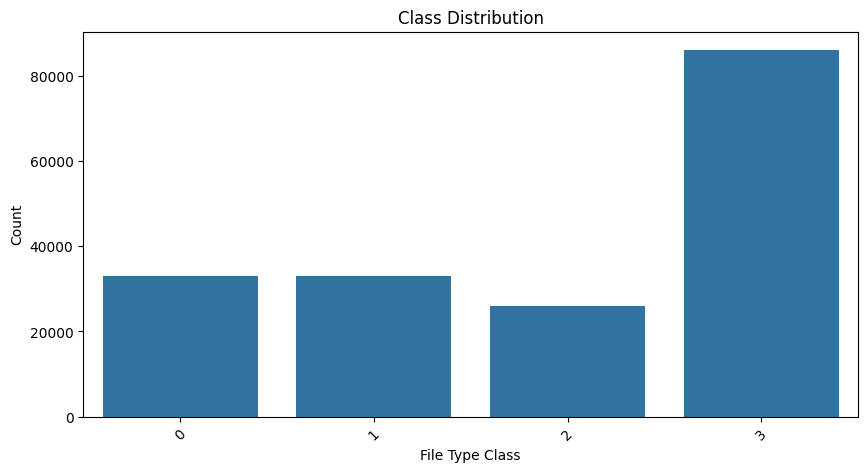

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot class distribution
plt.figure(figsize=(10,5))
sns.countplot(x=df['class_name'])
plt.xlabel("File Type Class")
plt.ylabel("Count")
plt.title("Class Distribution")
plt.xticks(rotation=45)
plt.show()

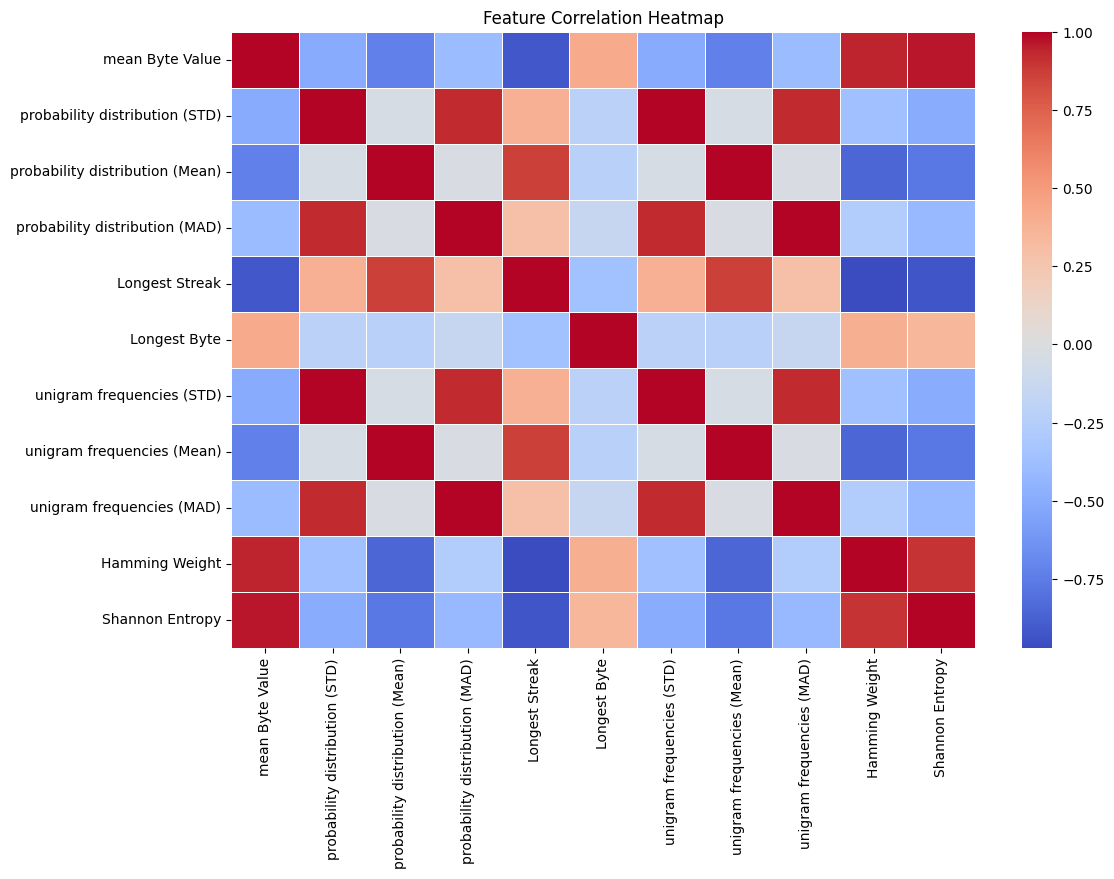

In [16]:
# Compute correlation matrix
plt.figure(figsize=(12,8))
sns.heatmap(df.drop(columns=['class_name']).corr(), annot=False, cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

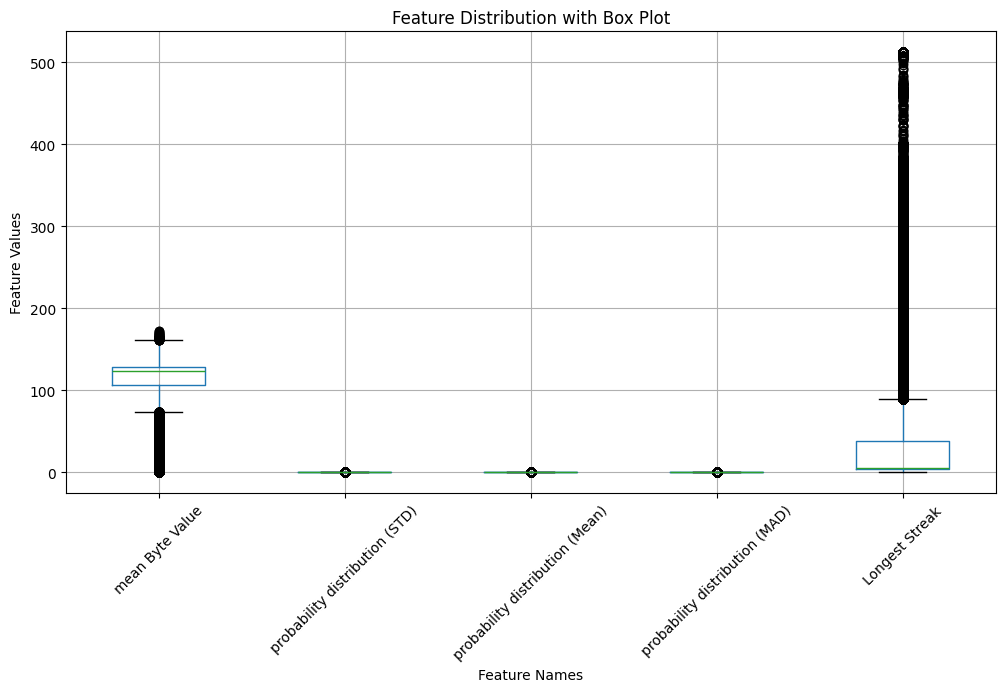

In [17]:
# Select some numeric features for box plot
sample_features = df.drop(columns=['class_name']).columns[:5]  # First 5 features

plt.figure(figsize=(12,6))
df[sample_features].boxplot(rot=45)
plt.title("Feature Distribution with Box Plot")
plt.ylabel("Feature Values")
plt.xlabel("Feature Names")
plt.show()

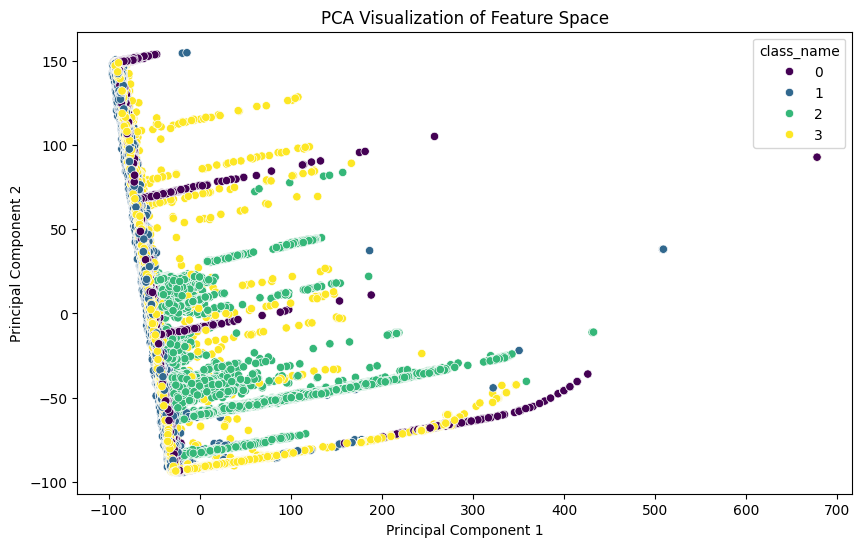

In [18]:
from sklearn.decomposition import PCA

# Reduce to 2 components for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df.drop(columns=['class_name']))

# Convert PCA output into DataFrame
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['class_name'] = df['class_name']

# Scatter plot of PCA
plt.figure(figsize=(10,6))
sns.scatterplot(x=pca_df['PC1'], y=pca_df['PC2'], hue=pca_df['class_name'], palette="viridis")
plt.title("PCA Visualization of Feature Space")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

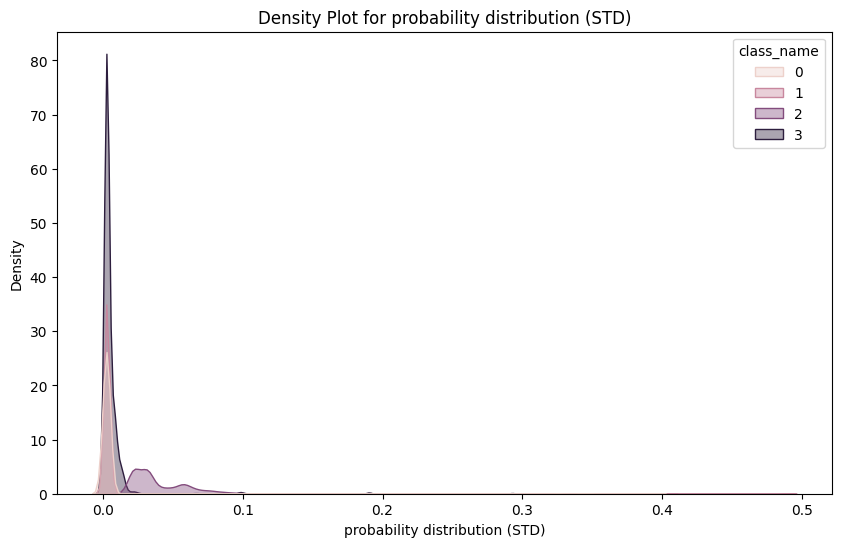

In [19]:
# Select a numerical feature
feature_name = df.columns[1]  # Select the 2nd column as an example

plt.figure(figsize=(10,6))
sns.kdeplot(data=df, x=feature_name, hue="class_name", fill=True, alpha=0.4)
plt.title(f"Density Plot for {feature_name}")
plt.xlabel(feature_name)
plt.ylabel("Density")
plt.show()

In [20]:
from sklearn.feature_selection import VarianceThreshold

# Define a variance threshold (remove near-constant features)
selector = VarianceThreshold(threshold=0.01)
X_selected = selector.fit_transform(df.drop(columns=['class_name']))  # Remove class column

# Get selected feature names
selected_features = df.drop(columns=['class_name']).columns[selector.get_support()]
print("Selected Features:", list(selected_features))

# Convert back to DataFrame
df_selected = pd.DataFrame(X_selected, columns=selected_features)
df_selected['class_name'] = df['class_name']  # Re-add the target column

Selected Features: ['mean Byte Value', 'probability distribution (Mean)', 'Longest Streak', 'Longest Byte', 'unigram frequencies (STD)', 'unigram frequencies (Mean)', 'unigram frequencies (MAD)', 'Hamming Weight', 'Shannon Entropy']


In [21]:
from sklearn.model_selection import train_test_split

# Define feature matrix (X) and target variable (y)
X = df_selected.drop(columns=['class_name'])  # Features
y = df_selected['class_name']  # Target (Labels)

# Perform stratified splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Confirm split shapes
print("Training Set Shape:", X_train.shape, y_train.shape)
print("Testing Set Shape:", X_test.shape, y_test.shape)

Training Set Shape: (142424, 9) (142424,)
Testing Set Shape: (35607, 9) (35607,)


In [22]:
from sklearn.preprocessing import StandardScaler
import joblib

# Initialize scaler
scaler = StandardScaler()

# Fit and transform training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform test data using same scaler
X_test_scaled = scaler.transform(X_test)

m1_sr = f"saved/m1/scaler.pkl"
# Save scaler for inference
joblib.dump(scaler, m1_sr)

# Confirm scaling
print("Feature Scaling Completed!")

Feature Scaling Completed!


In [23]:
# Convert scaled data back to DataFrame
X_train_df = pd.DataFrame(X_train_scaled, columns=selected_features)
X_test_df = pd.DataFrame(X_test_scaled, columns=selected_features)

# Calculate statistics
feature_stats = X_train_df.describe().T  # Transpose for better readability

# Add variance separately (since `.describe()` doesn't include variance)
feature_stats["variance"] = X_train_df.var()

# Display feature statistics
print("Feature Statistics:\n", feature_stats)

Feature Statistics:
                                     count          mean       std       min  \
mean Byte Value                  142424.0  9.690115e-16  1.000004 -3.434106   
probability distribution (Mean)  142424.0  2.813754e-17  1.000004 -0.224213   
Longest Streak                   142424.0 -3.332602e-17  1.000004 -0.436425   
Longest Byte                     142424.0  6.784939e-18  1.000004 -1.055426   
unigram frequencies (STD)        142424.0  2.743909e-17  1.000004 -0.445749   
unigram frequencies (Mean)       142424.0 -2.105327e-17  1.000004 -0.232440   
unigram frequencies (MAD)        142424.0  8.880288e-17  1.000004 -0.403564   
Hamming Weight                   142424.0  7.962325e-17  1.000004 -4.068442   
Shannon Entropy                  142424.0  3.672348e-16  1.000004 -3.625507   

                                      25%       50%       75%        max  \
mean Byte Value                 -0.114600  0.409609  0.574850   1.947608   
probability distribution (Mean) -0.2

In [24]:
X_test

,mean Byte Value,probability distribution (Mean),Longest Streak,Longest Byte,unigram frequencies (STD),unigram frequencies (Mean),unigram frequencies (MAD),Hamming Weight,Shannon Entropy
15023,125.619141,0.004608,3.0,165.0,1.295087,2.359447,1.069209,0.497314,7.554609
152411,0.000000,1.000000,512.0,0.0,0.000000,512.000000,0.000000,0.000000,0.000000
162056,128.181641,0.004425,6.0,185.0,1.310392,2.265487,1.017934,0.502441,7.602043
26303,119.339844,0.004566,6.0,77.0,1.349777,2.337900,1.028711,0.470703,7.561292
85691,68.769531,0.024390,110.0,32.0,17.885983,12.487805,9.616895,0.406250,4.543342
...,...,...,...,...,...,...,...,...,...
45382,127.095703,0.004405,4.0,49.0,1.207868,2.255507,0.963225,0.492920,7.632506
70953,121.494141,0.004525,4.0,58.0,1.250933,2.316742,0.994820,0.498535,7.592064
49242,133.253906,0.004587,3.0,144.0,1.383893,2.348624,1.153775,0.511230,7.532513
89485,76.158203,0.022727,185.0,32.0,28.060884,11.636364,12.938017,0.371582,3.837592


In [25]:
y_test

15023     1
152411    0
162056    3
26303     0
85691     2
         ..
45382     3
70953     3
49242     1
89485     2
114721    2
Name: class_name, Length: 35607, dtype: int64

In [ ]:
import json
import numpy as np
from tqdm import tqdm
from itertools import product
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.utils import parallel_backend

# Detect GPU availability
gpu_available = XGBClassifier(tree_method="gpu_hist").get_params().get("tree_method") == "gpu_hist"
tree_method = "gpu_hist" if gpu_available else "hist"

print(f"Using {'GPU' if gpu_available else 'CPU'} for XGBoost training.")

# Define XGBoost classifier with adaptive tree method
xgb = XGBClassifier(
    objective="multi:softmax",
    num_class=len(y_train.unique()), 
    use_label_encoder=False,
    eval_metric="mlogloss",
    tree_method="hist"  # Automatically switch between GPU and CPU
)

# Define hyperparameter grid
param_grid = {
    'n_estimators': [500],  
    'max_depth': [3],         
    'learning_rate': [0.1],  
    'subsample': [1.0],         
    'colsample_bytree': [1.0]   
}

# Count total parameter combinations
param_combinations = list(product(*param_grid.values()))
total_combinations = len(param_combinations)

# Initialize tqdm progress bar
progress_bar = tqdm(total=total_combinations, desc="GridSearch Progress", position=0, leave=True)

# Custom class to integrate tqdm with GridSearchCV
class TQDMGridSearchCV(GridSearchCV):
    def _run_search(self, evaluate_candidates):
        with tqdm(total=total_combinations, desc="Hyperparameter Tuning Progress") as pbar:
            def wrapped_evaluate(candidates, *args, **kwargs):
                pbar.update(len(candidates))  # Update tqdm
                return evaluate_candidates(candidates, *args, **kwargs)
            super()._run_search(wrapped_evaluate)

# Perform GridSearchCV with parallel processing
with parallel_backend("threading" if gpu_available else "multiprocessing"):  # Optimize parallelism
    grid_search = TQDMGridSearchCV(
        xgb, param_grid, cv=3, scoring="accuracy", verbose=2, n_jobs=-1
    )
    grid_search.fit(X_train_scaled, y_train)

# Close progress bar
progress_bar.close()

# Print best parameters
print("Best Hyperparameters:", grid_search.best_params_)

m1_bh = f"saved/m1/best_hyperparams.json"
# Save best hyperparameters as JSON
with open(m1_bh, "w") as f:
    json.dump(grid_search.best_params_, f, indent=4)

print("Best hyperparameters saved to best_hyperparams.json!")

Using GPU for XGBoost training.


GridSearch Progress:   0%|          | 0/1 [00:59<?, ?it/s]
c:\Users\thisi\Downloads\oggy\venv\Lib\site-packages\sklearn\utils\deprecation.py:71: FutureWarning: Class parallel_backend is deprecated; deprecated in 1.5 to be removed in 1.7. Use joblib.{} instead.
  warnings.warn(msg, category=FutureWarning)


Fitting 3 folds for each of 1 candidates, totalling 3 fits


Hyperparameter Tuning Progress: 100%|██████████| 1/1 [00:30<00:00, 30.10s/it]


KeyboardInterrupt: 

[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=500, subsample=1.0; total time= 3.0min
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=500, subsample=1.0; total time= 3.1min
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=500, subsample=1.0; total time= 3.2min


{'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500, 'subsample': 1.0}

In [ ]:
m1_xgb = f"saved/m1/xgboost_best_model.pkl"

# Save the best trained model
best_xgb = grid_search.best_estimator_
joblib.dump(best_xgb, m1_xgb)
print("Model saved successfully!")

Model saved successfully!


### LOAD SAVED MODEL

In [ ]:
import joblib

# Load the saved XGBoost model
best_xgb = joblib.load('saved/m1/best_xgb_model.pkl')

# Load the label encoder (to decode predictions if needed)
label_encoder = joblib.load('saved/m1/label_encoder.pkl')

Test Accuracy: 0.8229280759401242

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.81      0.77      6595
           1       0.79      0.48      0.59      6606
           2       1.00      1.00      1.00      5200
           3       0.82      0.91      0.86     17206

    accuracy                           0.82     35607
   macro avg       0.83      0.80      0.81     35607
weighted avg       0.82      0.82      0.81     35607



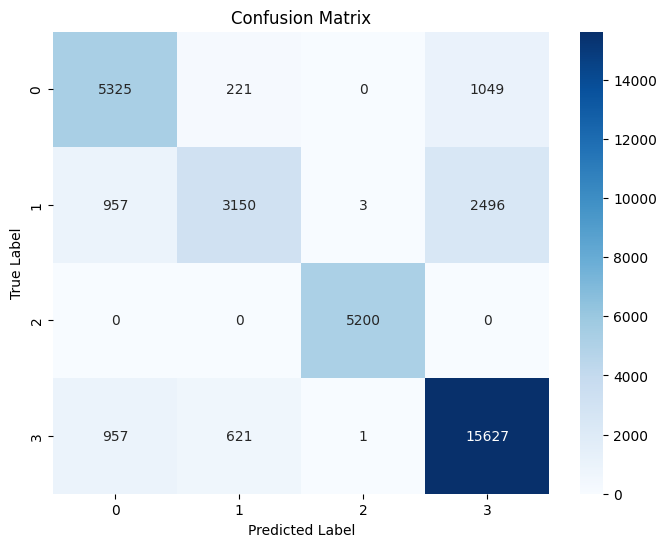

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Predict
y_pred = best_xgb.predict(X_test_scaled)

# Evaluate
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

Class Encoding Mapping: {'audio': 0, 'image': 1, 'text': 2, 'video': 3}

# INFERENCE

In [104]:
import os
import time

def extract_selected_features_with_metadata(file_path):
    """
    Extracts selected features from a given file and adds metadata like file size and load time.

    Args:
        file_path (str): Path to the input file.

    Returns:
        dict: Extracted features along with metadata.
    """
    start_time = time.time()  # Start load time tracking

    # Get file size in bytes
    file_size = os.path.getsize(file_path)

    # Extract main features (Assume `extract_selected_features()` is your existing function)
    features = extract_selected_features(file_path)

    load_time = time.time() - start_time  # Calculate load time

    # Add metadata
    features['file_size_bytes'] = file_size
    features['load_time_seconds'] = load_time

    return features

In [105]:
import os
import numpy as np
import collections
from itertools import groupby


def calculate_shannon_entropy(byte_array):
    """
    Calculates Shannon entropy of a byte sequence.
    """
    byte_counts = collections.Counter(byte_array)
    total_bytes = len(byte_array)
    
    probabilities = [count / total_bytes for count in byte_counts.values()]
    entropy = -sum(p * np.log2(p) for p in probabilities if p > 0)
    
    return entropy

def extract_selected_features(file_path):
    """
    Extracts statistical features from a file based on byte analysis.

    Args:
        file_path (str): Path to the input file.

    Returns:
        dict: Extracted features.
    """
    features = {}

    try:
        with open(file_path, "rb") as f:
            byte_array = np.frombuffer(f.read(), dtype=np.uint8)  # Read file as byte array
        
        if len(byte_array) == 0:
            return {"error": "Empty file"}

        # Mean Byte Value
        mean_byte_value = np.mean(byte_array)

        # Probability Distribution (Mean)
        prob_dist_mean = np.mean(byte_array / 255.0)  # Normalize bytes (0-255 range)

        # Longest Streak of Same Byte
        longest_streak = max(len(list(g)) for _, g in groupby(byte_array))

        # Longest Byte Value (Most frequent byte)
        longest_byte = collections.Counter(byte_array).most_common(1)[0][0]

        # Unigram Frequencies (Mean, STD, MAD)
        byte_counts = np.bincount(byte_array, minlength=256)
        byte_probs = byte_counts / byte_counts.sum()

        unigram_mean = np.mean(byte_probs)
        unigram_std = np.std(byte_probs)
        unigram_mad = np.mean(np.abs(byte_probs - unigram_mean))

        # Hamming Weight (Number of 1s in binary representation)
        hamming_weight = np.sum([bin(b).count("1") for b in byte_array])

        # Shannon Entropy
        entropy = calculate_shannon_entropy(byte_array)

        # Store all features
        features.update({
            "mean Byte Value": mean_byte_value,
            "probability distribution (Mean)": prob_dist_mean,
            "Longest Streak": longest_streak,
            "Longest Byte": longest_byte,
            "unigram frequencies (STD)": unigram_std,
            "unigram frequencies (Mean)": unigram_mean,
            "unigram frequencies (MAD)": unigram_mad,
            "Hamming Weight": hamming_weight,
            "Shannon Entropy": entropy
        })
        
    except Exception as e:
        features["error"] = str(e)

    return features

In [106]:
def predict_file_class_with_metadata(features, model, scaler):
    """
    Predicts the class of a file and provides additional metadata like file size and load time.

    Args:
        file_path (str): Path to the input file.
        model (XGBClassifier): Trained XGBoost model.
        scaler (StandardScaler): Scaler used during training.

    Returns:
        dict: Prediction results including class, confidence, file size, and load time.
    """

    # Prepare feature vector for model
    feature_vector = np.array([features[feat] for feat in [
        'mean Byte Value', 
        'probability distribution (Mean)', 
        'Longest Streak', 
        'Longest Byte', 
        'unigram frequencies (STD)', 
        'unigram frequencies (Mean)', 
        'unigram frequencies (MAD)', 
        'Hamming Weight', 
        'Shannon Entropy'
    ]]).reshape(1, -1)

    # Convert to DataFrame for compatibility with scaler
    feature_df = pd.DataFrame(feature_vector, columns=[
        'mean Byte Value', 
        'probability distribution (Mean)', 
        'Longest Streak', 
        'Longest Byte', 
        'unigram frequencies (STD)', 
        'unigram frequencies (Mean)', 
        'unigram frequencies (MAD)', 
        'Hamming Weight', 
        'Shannon Entropy'
    ])

    # Scale the feature vector
    feature_vector_scaled = scaler.transform(feature_df)

    # Get model predictions
    predicted_class_num = model.predict(feature_vector_scaled)[0]
    confidence_scores = model.predict_proba(feature_vector_scaled)
    confidence_score = np.max(confidence_scores)

    # Convert numeric class to string
    predicted_class_str = class_mapping.get(predicted_class_num, "Unknown")

    # Return results with metadata
    return {
        "predicted_class": predicted_class_str,
        "confidence_score": confidence_score,
        "file_size_bytes": features["file_size_bytes"],
        "load_time_seconds": features["load_time_seconds"]
    }

In [107]:
file_path = "/kaggle/input/video-mp4/video.mp4"

# Extract features + metadata
features = extract_selected_features_with_metadata(file_path)
print(features)

{'mean Byte Value': 127.61773740732708, 'probability distribution (Mean)': 0.5004617153228513, 'Longest Streak': 33, 'Longest Byte': 0, 'unigram frequencies (STD)': 0.00019166250229849796, 'unigram frequencies (Mean)': 0.00390625, 'unigram frequencies (MAD)': 0.00012006054286035268, 'Hamming Weight': 126146146, 'Shannon Entropy': 7.998372006995406, 'file_size_bytes': 31491130, 'load_time_seconds': 30.28263831138611}


In [ ]:
class_mapping = {0: "audio", 1: "image", 2: "text", 3: "video"}

In [110]:
# Run inference with metadata
result = predict_file_class_with_metadata(features, best_xgb, scaler)

# Print results
print(result)

{'predicted_class': 'video', 'confidence_score': 0.58912796, 'file_size_bytes': 31491130, 'load_time_seconds': 30.28263831138611}


# MODULE 1 OVER